In [1]:
# Question 8
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf  # Statsmodels is a Python module for statistics
import statsmodels.api as sm
%matplotlib inline

In [464]:
df = pd.read_csv("auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [465]:
# 8(a)
# prepare data for modelling (training set)
x_train = df['horsepower'] # horsepower as predictor
y_train = df['mpg'] # mpg as response

In [466]:
x_train.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [467]:
y_train.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [468]:
x_train.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [469]:
# handling with '?' observations (delete them)
droplist = x_train[x_train == '?'].index # get the index of observation with '?' value
x_train = x_train.drop(droplist) # drop thoses observations
y_train = y_train.drop(droplist) # ensuring dimensional compatability b/w variables
x_train.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [470]:
y_train.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [471]:
# create dataframe to use statsmodel (Statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests)
d = {'horsepower':x_train.astype('float'), 'mpg':y_train}
df = pd.DataFrame(data = d)
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


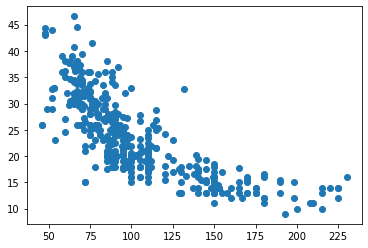

In [472]:
plt.scatter(df['horsepower'], df['mpg'])


In [473]:
# using statsmodel for linear regression 
mod = smf.ols(formula = 'mpg~horsepower', data = df) # ols= Ordinary Least Squares
res = mod.fit() 
print(res.summary())

# Findings: 1) Yes, there is a relation, since F-Statistics is much greater than 1 and p-value is close to 0.
#           2) Since, R-squared value is 0.606 (60.6%), we can say that 60% of variance in mpg is explained by horsepower.
#           3) -ve relationship (since coeficient corresponding to horsepower is -0.1578).
#           4) tricky to do in Python. Use R for this.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           7.03e-81
Time:                        16:01:11   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

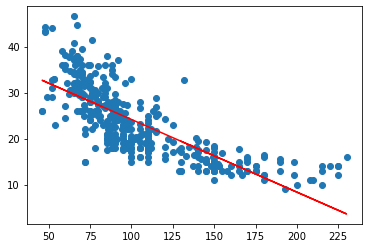

In [503]:
# 8(b)
plt.subplots(1,1) # to get both plots in same figure
plt.scatter(x_train.astype('float'), y_train);
plt.plot(x_train.astype('float'), res.fittedvalues, color = 'red');

In [475]:
# 8(c): use R for this. Python can also do it but requires more lines of code: https://botlnec.github.io/islp/sols/chapter3/exercise8/

In [476]:
# Question 9
df = pd.read_csv("auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


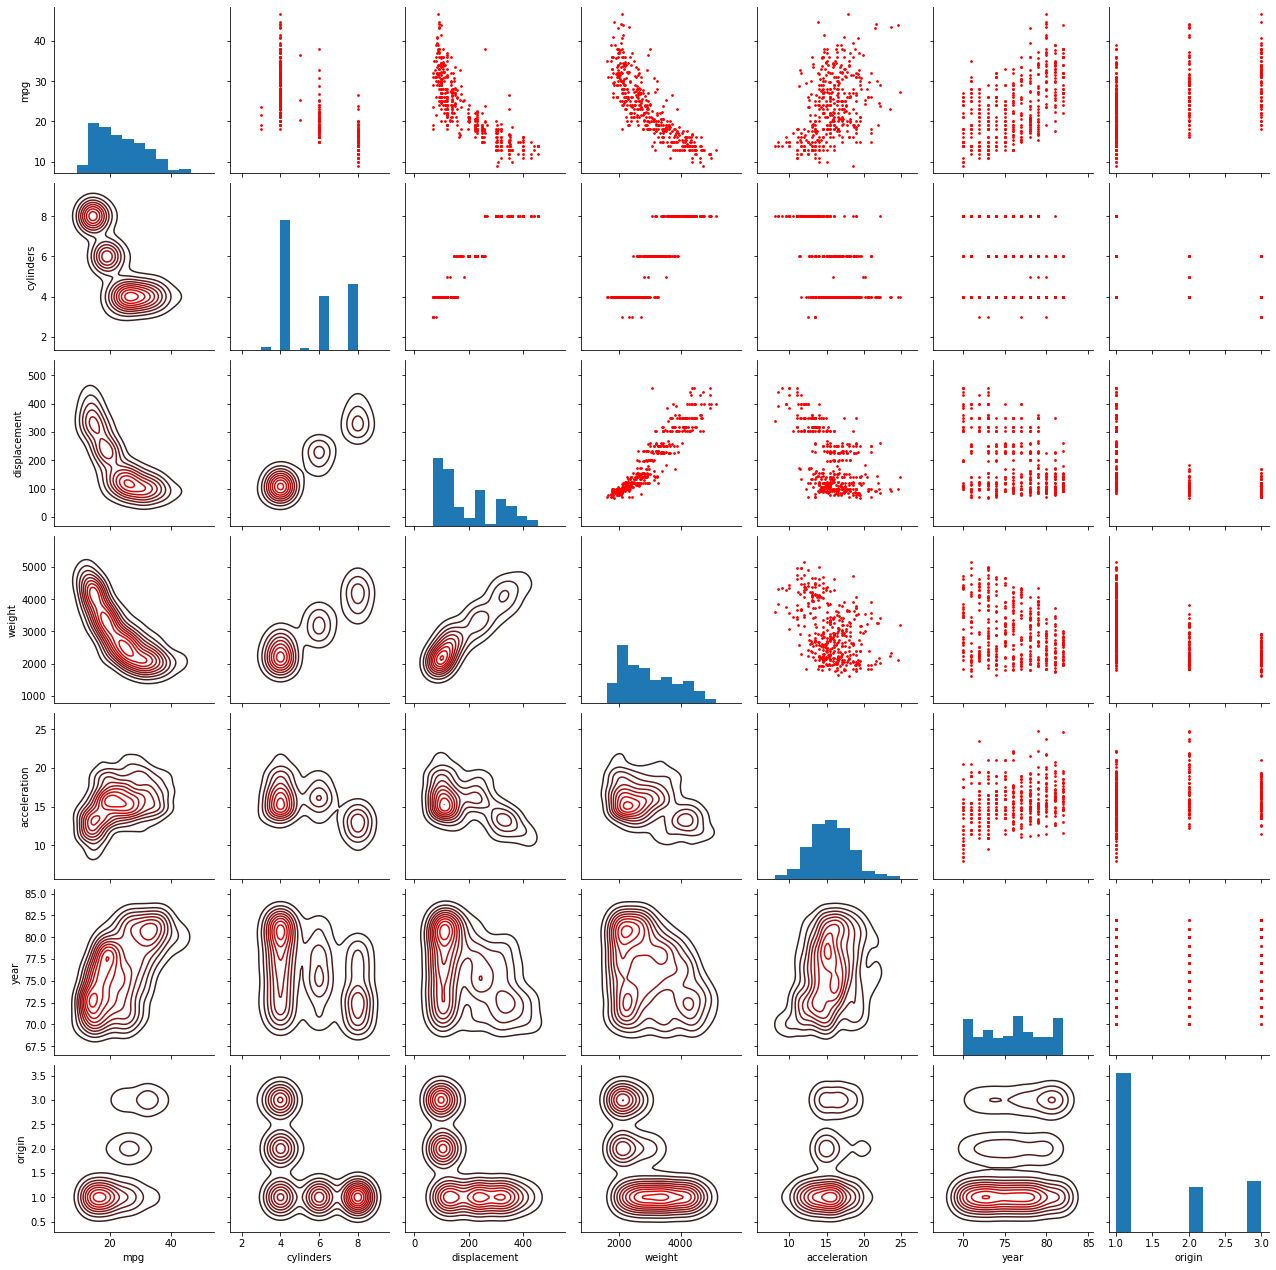

In [477]:
# 9(a)
g = sns.PairGrid(df)
g.map_upper(plt.scatter,s=3, color = 'red')
g.map_lower(sns.kdeplot, color = 'red')
g.map_diag(plt.hist)

In [478]:
# 9(b)
df.corr() # to correlate
# pandas' corr() function takes care of excluding non numeric data. 

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


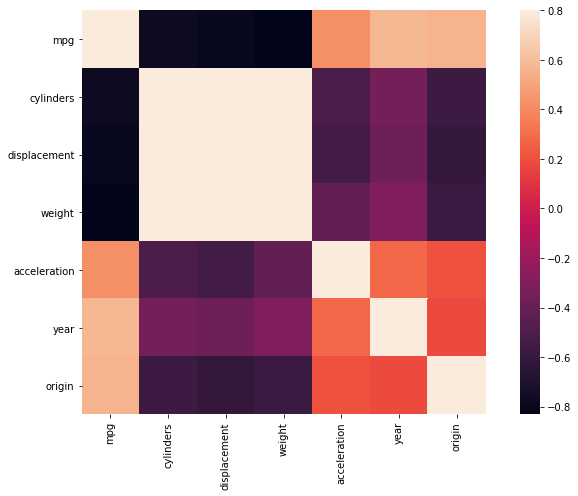

In [479]:
# also lets draw correlation heatmap
corrmat = df.corr() 
f, ax = plt.subplots(figsize = (10,7)) # setting up  the matplotlib figure
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .8, square = True)
f.tight_layout()

In [480]:
# 9(c)
reg = smf.ols('mpg~ cylinders + displacement + weight + acceleration + year + origin', df).fit()
reg.summary()
# Output: 1) Yes there is a relationship since F-Statistics is far from 1.
#         2) By looking at p-value, we can say year, origin, weight and displacement are statistically significant.
#         3) It suggests that when other variables are held constant, an increase f one year will correspont to increase of 0.77 of mpg (so, the more recent -> the more efficient.) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     298.9
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          1.72e-142
Time:                        16:01:52   Log-Likelihood:                -1037.7
No. Observations:                 397   AIC:                             2089.
Df Residuals:                     390   BIC:                             2117.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -20.1358      4.145     -4.858      0.000     -28.286     -11.986
cylinders       -0.4198      0.320     -1.311      0.191      -1.049       0.210
displacement     0.0174      0.007      2.423      0.016       0.003       0.032
weight          -0.0069      0.001    -11.983      0.000      -0.008      -0.006
acceleration     0.1591      0.077      2.055      0.041       0.007       0.311
year             0.7703      0.049     15.613      0.000       0.673       0.867
origin           1.3560      0.269      5.040      0.000       0.827       1.885
==============================================================================
Omnibus:                       29.082   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.906
Skew:                           0.494   Prob(JB):                     6.52e-11
Kurtosis:                       4.363   Cond. No.                     7.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [481]:
reg = smf.ols('mpg ~ horsepower + cylinders + displacement + weight + acceleration + year + origin', df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     27.92
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          9.67e-107
Time:                        16:01:52   Log-Likelihood:                -916.56
No. Observations:                 397   AIC:                             2033.
Df Residuals:                     297   BIC:                             2432.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -19.8320      4.25

In [482]:
# 9(d): Use R. Although it can be done in python too: https://botlnec.github.io/islp/sols/chapter3/exercise9/
# Output: No, there are no unusually large outliers, as per the the scale log location. They are however skewedly distributed. The larger the fitted value, the larger the variance, since the spread of the residuals increases.
# No, even though there is an observation (number 13) with higher leverage, it is still well within Cook's 0.5 distance.
# The normal qq-plot deviates at one extreme, which could indicate that there are other explanatory predictors that we are not considering (quadratic terms, for example). Additionally, the funnel shape of the residuals plot indicates heteroskedacity.


In [483]:
# 9(e)
reg = smf.ols('mpg ~ displacement*origin + year + weight + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     365.3
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          6.92e-145
Time:                        16:01:52   Log-Likelihood:                -1035.1
No. Observations:                 397   AIC:                             2082.
Df Residuals:                     391   BIC:                             2106.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -23.7919      4.218     -5.641      0.000     -32.084     -15.500
displacement            0.0287      0.008      3.457      0.001       0.012       0.045
origin                  3.9721      0.869      4.569      0.000       2.263       5.681
displacement:origin    -0.0256      0.008     -3.302      0.001      -0.041      -0.010
year                    0.7914      0.049     16.134      0.000       0.695       0.888
weight                 -0.0061      0.001    -10.665      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       34.306   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.586
Skew:                           0.480   Prob(JB):                     2.85e-16
Kurtosis:                       4.846   Cond. No.                     7.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [484]:
model = 'mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year'
reg = smf.ols(model, df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     15.09
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           7.21e-50
Time:                        16:01:53   Log-Likelihood:                -711.88
No. Observations:                 397   AIC:                             1940.
Df Residuals:                     139   BIC:                             2968.
Df Model:                         257                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -55.5627     80.914     -0.687      0.493    -215.543     104.418
horsepower[T.102]              -2.892e-06   3.72e-06     -0.777      0.438   -1.03e-05    4.47e-06
horsepower[T.103]              -8.163e-07   6.15e-07     -1.327      0.187   -2.03e-06       4e-07
horsepower[T.105]                -24.4429     22.318     -1.095      0.275     -68.569      19.684
horsepower[T.107]              -5.499e-07   9.03e-07     -0.609      0.543   -2.33e-06    1.24e-06
horsepower[T.108]              -1.873e-06   6.09e-07     -3.077      0.003   -3.08e-06   -6.69e-07
horsepower[T.110]                -27.1968     48.960     -0.555      0.579    -123.999      69.605
horsepower[T.112]                  0.0009      0.014      0.062      0.951      -0.027       0.028
horsepower[T.113]               4.828e-08   1.16e-06      0.042      0.967   -2.25e-06    2.34e-06
horsepower[T.115]                 86.6207    146.951      0.589      0.557    -203.928     377.169
horsepower[T.116]               -1.45e-06   6.12e-07     -2.370      0.019   -2.66e-06    -2.4e-07
horsepower[T.120]                  0.0023      0.078      0.029      0.977      -0.153       0.157
horsepower[T.122]              -1.812e-06   7.42e-07     -2.442      0.016   -3.28e-06   -3.45e-07
horsepower[T.125]                 -0.0274      0.059     -0.463      0.644      -0.144       0.090
horsepower[T.129]                 -0.0003      0.000     -1.320      0.189      -0.001       0.000
horsepower[T.130]                -51.6548    121.985     -0.423      0.673    -292.841     189.532
horsepower[T.132]              -5.498e-07   6.06e-07     -0.908      0.366   -1.75e-06    6.48e-07
horsepower[T.133]               -1.13e-06   3.39e-07     -3.330      0.001    -1.8e-06   -4.59e-07
horsepower[T.135]                3.36e-07   4.49e-07      0.748      0.456   -5.52e-07    1.22e-06
horsepower[T.137]               6.015e-08   2.85e-07      0.211      0.833   -5.04e-07    6.24e-07
horsepower[T.138]               3.842e-07   5.47e-07      0.703      0.483   -6.96e-07    1.46e-06
horsepower[T.139]                 -0.0003      0.000     -0.713      0.477      -0.001       0.000
horsepower[T.140]                  1.4622     38.817      0.038      0.970     -75.286      78.210
horsepower[T.142]               3.099e-07   5.32e-07      0.583      0.561   -7.42e-07    1.36e-06
horsepower[T.145]                  6.8281     50.926      0.134      0.894     -93.862     107.518
horsepower[T.148]               2.554e-07   3.84e-07      0.664      0.508   -5.05e-07    1.02e-06
horsepower[T.149]               3.617e-07   4.46e-07      0.810      0.419   -5.21e-07    1.24e-06
horsepower[T.150]                 -8.5229     22.089     -0.386      0.700     -52.198      35.152
horsepower[T.1

In [485]:
# 9(f)
reg = smf.ols('mpg ~ displacement + np.power(displacement,2) + np.log(displacement) + np.sqrt(displacement) + weight + year + origin', df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     307.8
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          2.62e-154
Time:                        16:01:53   Log-Likelihood:                -1006.9
No. Observations:                 397   AIC:                             2030.
Df Residuals:                     389   BIC:                             2062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -280.8309    120.399     -2.333      0.020    -517.545     -44.117
displacement                  1.9208      0.751      2.557      0.011       0.444       3.398
np.power(displacement, 2)    -0.0007      0.000     -2.341      0.020      -0.001      -0.000
np.log(displacement)        169.7571     71.050      2.389      0.017      30.066     309.448
np.sqrt(displacement)       -70.7280     27.899     -2.535      0.012    -125.579     -15.877
weight                       -0.0054      0.001    -10.000      0.000      -0.006      -0.004
year                          0.8188      0.046     17.747      0.000       0.728       0.910
origin                        0.2554      0.273      0.936      0.350      -0.281       0.792
==============================================================================
Omnibus:                       40.162   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.407
Skew:                           0.501   Prob(JB):                     2.59e-22
Kurtosis:                       5.237   Cond. No.                     6.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [486]:
reg = smf.ols('mpg ~ displacement + np.power(displacement,2) + np.sqrt(displacement) + np.log(displacement) + np.sqrt(displacement) + weight + year + origin', df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     307.8
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          2.62e-154
Time:                        16:01:53   Log-Likelihood:                -1006.9
No. Observations:                 397   AIC:                             2030.
Df Residuals:                     389   BIC:                             2062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -280.8309    120.399     -2.333      0.020    -517.545     -44.117
displacement                  1.9208      0.751      2.557      0.011       0.444       3.398
np.power(displacement, 2)    -0.0007      0.000     -2.341      0.020      -0.001      -0.000
np.sqrt(displacement)       -70.7280     27.899     -2.535      0.012    -125.579     -15.877
np.log(displacement)        169.7571     71.050      2.389      0.017      30.066     309.448
weight                       -0.0054      0.001    -10.000      0.000      -0.006      -0.004
year                          0.8188      0.046     17.747      0.000       0.728       0.910
origin                        0.2554      0.273      0.936      0.350      -0.281       0.792
==============================================================================
Omnibus:                       40.162   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.407
Skew:                           0.501   Prob(JB):                     2.59e-22
Kurtosis:                       5.237   Cond. No.                     6.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [487]:
# Question 10
url = 'https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/ISLR/Carseats.csv'
df = pd.read_csv(url)

In [488]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [489]:
df = df.drop('Unnamed: 0', axis = 1)

In [490]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [491]:
# 10(a)
reg = smf.ols('Sales ~ Price + Urban + US', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           2.39e-23
Time:                        16:01:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [492]:
# Question 10(b)
# Urban: Not statistically significant as p-value is high. 
# US: +ve relationship, statistically significant. This means that when the observation is US, there will be a tendency for higher sales values. On average, if a store is located in the US, it will sell 1201 more units, approximately. 
# Price: -ve relationship, statistically significant. This means that the higher the prices, the lower the sales. On average, for every dollar that the price increases sales will drop by 55 units, approximately.

In [493]:
# 10(c): Sales = 13.0435 - 0.0219 Urban + 1.2006 US - 0.0545 Price 

In [494]:
# 10(d): From the summary above, we can reject the null hypothesis for the intercept, US and Price, but not for Urban.

In [495]:
# 10(e)
reg1 = smf.ols('Sales ~ Price + US', df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           2.66e-24
Time:                        16:01:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
# 10(f): 
# To compare how well the models fit, we can consider the value of R-squared. R-squared is the coefficient of determination. 
# The coefficient of determination measures how much of the variance can be explained by the independent variables considered in the model.
# Since R-squared has the same value, namely 0.239, for both models we can conclude that the strictly smaller model (e), is a better model since it uses less variables for the same value of R-squared. This can also be seen in the value of the adjusted R-squared which is smaller for (e). 
# In any case neither model fits the data very well given the low value of R-squared.



In [497]:
# 10(g)
# The prediction interval predicts in what range a future individual observation will fall, 
# while a confidence interval shows the likely range of values associated with some statistical parameter of the data, such as the population mean.
# Solutions: It is easier on R Programming (use predict(lm.fit, level=0.95)). In case of Python, refer: https://botlnec.github.io/islp/sols/chapter3/exercise10/

In [498]:
# 10(h): Use R Programming.
# An outlier is a data point whose response y does not follow the general trend of the rest of the data.
# A data point has high leverage if it has "extreme" predictor x values
# To investigate the presence of outliers or high leverage points, we analyse a plot of standardized residuals against leverages.
# Cook's distance essentially measures the effect of deleting a given observation. Points with a large Cook's distance need to be closely examined for being potential outliers
# To understand leverage, outlier, cook's distance better: https://www.youtube.com/watch?v=xc_X9GFVuVU
# Output: From this plot we can that no outliers (all less than 3). Since (p+1)/n = 3/400 = 0.0075, we can see that there a few candidates for high leverage points, although every point is well below a Cook's distance of 1.
# So on the whole this indicates that there are no outliers, but that there are some high leverage points although likely not very influential.

In [499]:
np.shape(df)

(400, 11)

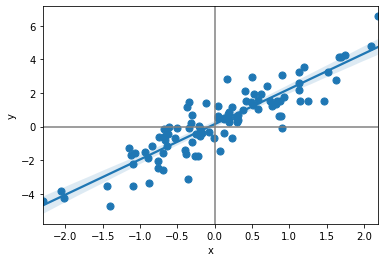

In [500]:
# Question 11
np.random.seed(1)
x= np.random.normal(size = 100)
y=2*x+np.random.normal(size = 100)
df = pd.DataFrame({'x':x, 'y':y})
fig, ax = plt.subplots()
sns.regplot(x='x', y='y', data = df, scatter_kws={"s": 50, "alpha": 1}, ax=ax)
ax.axhline(color='gray')
ax.axvline(color='gray')


In [76]:
# 11(a)
reg = smf.ols('y~x+0', df).fit()
reg.summary()
# Output: Since p-value is 0, null hypothesis is rejected.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):                    3.46e-36
Time:                        07:57:24   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# 11(b)
reg = smf.ols('x~y+0', df).fit()
reg.summary()
# Output: Since p-value is 0, null hypothesis is rejected.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):                    3.46e-36
Time:                        08:01:59   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# 11(c)(d)(e): https://botlnec.github.io/islp/sols/chapter3/exercise11/

In [81]:
# 11(f)
reg = smf.ols('y~x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           5.39e-36
Time:                        08:10:05   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1470      0.094      1.564      0.121      -0.039       0.334
x              2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
reg = smf.ols('x~y', df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           5.39e-36
Time:                        08:10:16   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0440      0.040     -1.090      0.279      -0.124       0.036
y              0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# Question 12(a)
# refer https://botlnec.github.io/islp/sols/chapter3/exercise12/

In [9]:
# 12(b)
x = np.arange(100)

In [12]:
y = x + np.random.normal(100)

In [19]:
df = pd.DataFrame({'x':x, 'y':y})


In [24]:
reg = smf.ols('y~x + 0', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              807.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):                    2.16e-49
Time:                        01:05:13   Log-Likelihood:                         -533.60
No. Observations:                 100   AIC:                                      1069.
Df Residuals:                      99   BIC:                                      1072.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.5039      0.088     28.408      0.000       2.329       2.679
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.002
Skew:                          -0.000   Prob(JB):                       0.0497
Kurtosis:                       1.800   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
reg = smf.ols('x~y+0', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              807.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):                    2.16e-49
Time:                        01:05:22   Log-Likelihood:                         -436.03
No. Observations:                 100   AIC:                                      874.1
Df Residuals:                      99   BIC:                                      876.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3557      0.013     28.408      0.000       0.331       0.381
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.002
Skew:                           0.000   Prob(JB):                       0.0497
Kurtosis:                       1.800   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
# Alternate approach: to use linear regression models as an alternative to statsmodels
from sklearn.linear_model import LinearRegression 

In [40]:
# reshape to avoid problems with LinearRegression
# sklearn requires the data shape of (row number, column number), which means shape can't be (X,); it must be (X,1)
x = x.reshape(np.shape(x)[0],1)
y = y.reshape(np.shape(y)[# 0],1)

# Although here, if u avoid this cell, even then the output wont show any error.

In [41]:
lr = LinearRegression(fit_intercept=False) #without intercept
lr.fit(x,y)
lr.coef_


array([[2.50385512]])

In [42]:
lr.fit(y,x)
lr.coef_


array([[0.3557431]])

In [66]:
# 12(c): to ensure same coefficient, we must have sum(x2) = sum(y2). As seen in 12(a)
x = np.arange(100)
y = np.random.permutation(x)
df = pd.DataFrame({'x': x, 'y': y})

In [68]:
reg = smf.ols('x~y+0', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.597
Method:                 Least Squares   F-statistic:                              149.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):                    1.76e-21
Time:                        02:21:52   Log-Likelihood:                         -500.76
No. Observations:                 100   AIC:                                      1004.
Df Residuals:                      99   BIC:                                      1006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.7754      0.063     12.218      0.000       0.649       0.901
==============================================================================
Omnibus:                        1.505   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.215
Skew:                          -0.028   Prob(JB):                        0.545
Kurtosis:                       2.463   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
reg = smf.ols('y~x+0', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.597
Method:                 Least Squares   F-statistic:                              149.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):                    1.76e-21
Time:                        02:22:00   Log-Likelihood:                         -500.76
No. Observations:                 100   AIC:                                      1004.
Df Residuals:                      99   BIC:                                      1006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.7754      0.063     12.218      0.000       0.649       0.901
==============================================================================
Omnibus:                        0.980   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.935
Skew:                           0.011   Prob(JB):                        0.626
Kurtosis:                       2.527   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# Question 13 (a)
np.random.seed(1) # to fix random variables
x= np.random.normal(size = 100) #np.random.normal is different from np.arange.

In [123]:
# 10(b)
eps = np.random.normal(scale=0.25, size=100)

In [129]:
eps


array([-0.11178214,  0.30612693,  0.10087291,  0.14839463, -0.27372796,
        0.04234561,  0.18513911, -0.23842515, -0.06655463,  0.00815364,
       -0.34327933,  0.07878985,  0.21154016, -0.21487899,  0.08763649,
       -0.32807085, -0.00967388, -0.40394309,  0.28035443,  0.10222513,
       -0.00615424, -0.1937904 ,  0.31843898,  0.49177544, -0.46449547,
        0.30904101,  0.40691269,  0.08450292, -0.29981701,  0.21583633,
       -0.04523008, -0.15098016, -0.30751453,  0.13763437,  0.19820172,
       -0.15588268,  0.13014408, -0.28608535,  0.20046526,  0.01164182,
       -0.04664244, -0.02543647,  0.21722154,  0.18760291,  0.13236633,
        0.0344253 ,  0.01945528,  0.15459507,  0.05812364,  0.17063785,
       -0.07752919, -0.60870944,  0.25970615,  0.54674491,  0.11034111,
       -0.02503881, -0.03411119, -0.02976355,  0.00435235, -0.28050468,
       -0.12927361, -0.24925671,  0.06219979, -0.07416029,  0.12380283,
       -0.04367579,  0.2465838 ,  0.05338348,  0.54767493, -0.47

In [130]:
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

In [126]:
# 10(c)
y = -1 + 0.5*x + eps  # B0 is -1 and B1 is 0.5
print('Length of y is ' + str(len(y)))


Length of y is 100


Text(0, 0.5, 'y')

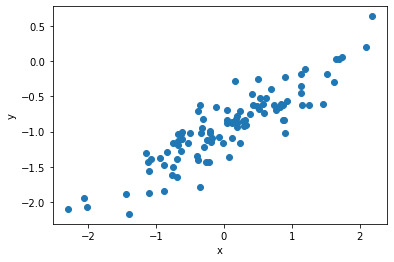

In [133]:
# 10(d)
df = pd.DataFrame({'x': x, 'y': y})
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
# Findings: x and y has a positive linear relationship with a variance on the order of 0.5. No alarming indication of high leverage points or outliers.

In [136]:
# 13(e)
reg = smf.ols('y~x', df).fit()
reg.summary()
# Finding: The coefficients of the regression are similar to the "true" values, although they are not equal (naturally). They fall within the 95% confidence interval in both cases.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.39e-36
Time:                        03:42:29   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

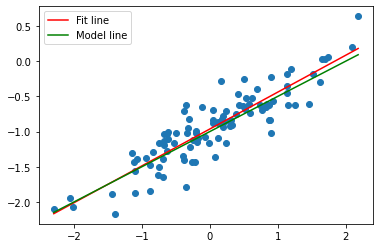

In [185]:
# 13(f)
model = LinearRegression(fit_intercept= True)
model.fit(x[:, np.newaxis],y)


plt.scatter(df.x, df.y);

xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color='r');

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color = 'g'); # Population regression line (actual)
plt.legend([fit, pop],['Fit line','Model line'])

In [196]:
#13(g)
reg = smf.ols('y~x+np.power(x,2)', df).fit()
reg.summary()
# Finding: Since p-value of x2 is high, we cannot reject null hypothesis i.e. there is no statistically significant relationship between X2 and Y  - the quadratic term does not improve the model fit. 
# This is also evident when comparing the R-squared of both fits. They are equal, even though the second model has an additional variable.

 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           1.32e-34
Time:                        05:11:04   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x                  0.5234      0.027     19.582      0.000       0.470       0.576
np.power(x, 2)     0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

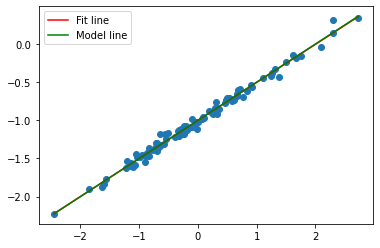

In [234]:
# 13(h)
x = np.random.normal(size=100)
eps = np.random.normal(scale=0.05, size=100) # variance decreased from 0.25 to 0.05
y = -1 + 0.5*x + eps

df = pd.DataFrame({'x': x, 'y': y})

model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis],y) # to fit the linear regression

plt.scatter(df.x, df.y);

xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color = 'r');

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color = 'g'); # Population regression line (actual)
plt.legend([fit, pop],['Fit line','Model line'])


In [223]:
reg = smf.ols('y~x', df).fit()
reg.summary()

# Findings: As expected, we have a better fit, a better confidence intervals, and a higher R-squared.
#           Our model fits this data set better than the previous one that was generated from a noisier distribution.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.66e-105
Time:                        05:35:21   Log-Likelihood:                 167.03
No. Observations:                 100   AIC:                            -330.1
Df Residuals:                      98   BIC:                            -324.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9985      0.005   -216.105      0.000      -1.008      -0.989
x              0.4932      0.004    112.712      0.000       0.484       0.502
==============================================================================
Omnibus:                        1.750   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.324
Skew:                           0.010   Prob(JB):                        0.516
Kurtosis:                       2.437   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

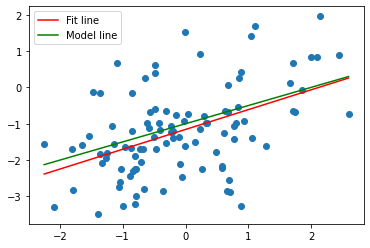

In [239]:
# 13(h)
x = np.random.normal(size=100)
eps = np.random.normal(scale=1, size=100) # variance decreased from 0.25 to 0.05
y = -1 + 0.5*x + eps

df = pd.DataFrame({'x': x, 'y': y})

model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis],y) # to fit the linear regression

plt.scatter(df.x, df.y);

xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color = 'r');

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color = 'g'); # Population regression line (actual)
plt.legend([fit, pop],['Fit line','Model line'])


In [244]:
reg = smf.ols('y~x', df).fit()
reg.summary()
# Findings: As expected, we have a poor fit, much wider confidence intervals, and a lower R-squared.
#           Our model fits this data set poor than the previous one because this dataset is generated from a noisier distribution.
#           Still there's no doubt we are in the presence of a statistically significant relationship, with very low p-values.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     28.92
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.12e-07
Time:                        05:53:50   Log-Likelihood:                -147.17
No. Observations:                 100   AIC:                             298.3
Df Residuals:                      98   BIC:                             303.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1573      0.107    -10.831      0.000      -1.369      -0.945
x              0.5449      0.101      5.378      0.000       0.344       0.746
==============================================================================
Omnibus:                        1.430   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.201
Skew:                           0.268   Prob(JB):                        0.548
Kurtosis:                       3.003   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
# 13(j): check the three tables above

In [530]:
# Question 14(a)
np.random.seed(5) 
x1 = np.random.uniform(size = 100)
x2 = 0.5*x1 + np.random.normal(size = 100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = 100)


In [531]:
# 14(b)
np.corrcoef(x1,x2)
# Findings: The correlation coefficient between x1 and x2 is 0.81936924

array([[1.        , 0.81936924],
       [0.81936924, 1.        ]])

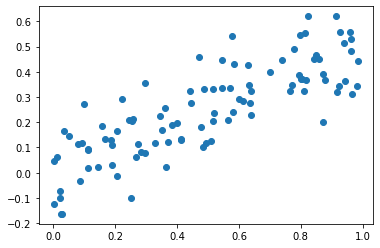

In [532]:
plt.scatter(x1,x2);
# Findings: positive linear relationship. It represents collinearity as there is a relation b/w x1 and x2.

In [533]:
# 14(c)
df = ({'x1':x1, 'x2': x2, 'y': y})
reg = smf.ols('y~x1+x2', df).fit()
reg.summary()
# B0 is 1.8158, B1 is 2.0758, B2 is 0.7584. These values similar to true coefficients 2,2,0.3 respectively
# Yes we can reject null hypothesis of B1 = 0 since its p-value is low. 
# But we cannot reject null hypothesis of B2 = 0 since its t-statistic is low (0.929) and the p-value is high (0.355). 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     38.74
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           4.31e-13
Time:                        16:12:23   Log-Likelihood:                -123.67
No. Observations:                 100   AIC:                             253.3
Df Residuals:                      97   BIC:                             261.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8158      0.162     11.231      0.000       1.495       2.137
x1             2.0758      0.488      4.257      0.000       1.108       3.044
x2             0.7584      0.817      0.929      0.355      -0.862       2.379
==============================================================================
Omnibus:                        0.718   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.574
Skew:                          -0.185   Prob(JB):                        0.750
Kurtosis:                       2.981   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [534]:
# 14(d)
reg = smf.ols('y~x1', df).fit()
reg.summary()
# The coefficient increased from 2.0758 to 2.4468
# Since t statistics is high and p-value is low, we can reject null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     76.72
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           5.93e-14
Time:                        16:12:23   Log-Likelihood:                -124.11
No. Observations:                 100   AIC:                             252.2
Df Residuals:                      98   BIC:                             257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8229      0.161     11.295      0.000       1.503       2.143
x1             2.4468      0.279      8.759      0.000       1.892       3.001
==============================================================================
Omnibus:                        0.357   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.272
Skew:                          -0.127   Prob(JB):                        0.873
Kurtosis:                       2.963   Cond. No.                         4.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [535]:
# 14(e)
reg = smf.ols('y~x2', df).fit()
reg.summary()
# The coefficient value increased to 3.6070 and the null hypothesis can be rejected because p-value is zero.
# These results are significantly different from 14(c). 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     50.53
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.92e-10
Time:                        16:12:23   Log-Likelihood:                -132.23
No. Observations:                 100   AIC:                             268.5
Df Residuals:                      98   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1250      0.157     13.572      0.000       1.814       2.436
x2             3.6070      0.507      7.108      0.000       2.600       4.614
==============================================================================
Omnibus:                        1.537   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.597
Skew:                          -0.272   Prob(JB):                        0.450
Kurtosis:                       2.704   Cond. No.                         5.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [536]:
# 14(f)
# The results do not contradict. What's happening here is a collinearity phenomenon.
# As suggested by the high correlation values and by the scatter plot (and, of course, from the generation of Y), we can linearly predict x1 and x2 with a substantial degree of accuracy. 
# This is a clue of collinearity that is confirmed by the regression model. When both variables are combined in the same linear model, one of them loses explanatory power because the variance it explains is already being explained by the other variable.
# Accordingly, if considered individually, both variables lead to the rejection of the null hypothesis but, if considered together, one of the variables is dismissable.
# Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for β̂1 to grow (we have a standard error of 0.7211795 and 1.1337225 for “x1” and “x2” respectively in the model with two predictors and only of 0.3962774 and 0.6330467 for “x1” and “x2” respectively in the models with only one predictor). 
# Consequently, we may fail to reject H0 in the presence of collinearity. The importance of the “x2” variable has been masked due to the presence of collinearity.

In [537]:
# 14(g)
x1 = np.append(x1, 0.1) # The append() method in python adds a single item to the existing list.
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

In [538]:

df = ({'x1':x1, 'x2': x2, 'y': y})
reg = smf.ols('y~x1+x2', df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     36.26
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.64e-12
Time:                        16:12:23   Log-Likelihood:                -129.50
No. Observations:                 101   AIC:                             265.0
Df Residuals:                      98   BIC:                             272.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8697      0.168     11.111      0.000       1.536       2.204
x1             1.2421      0.432      2.876      0.005       0.385       2.099
x2             2.2711      0.698      3.254      0.002       0.886       3.656
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.465
Skew:                          -0.165   Prob(JB):                        0.792
Kurtosis:                       3.035   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [539]:
reg = smf.ols('y~x1', df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     56.46
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           2.60e-11
Time:                        16:12:24   Log-Likelihood:                -134.68
No. Observations:                 101   AIC:                             273.4
Df Residuals:                      99   BIC:                             278.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9419      0.175     11.116      0.000       1.595       2.288
x1             2.2829      0.304      7.514      0.000       1.680       2.886
==============================================================================
Omnibus:                       12.832   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.470
Skew:                           0.522   Prob(JB):                     2.18e-05
Kurtosis:                       5.003   Cond. No.                         4.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [540]:
reg = smf.ols('y~x2', df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     59.84
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           8.79e-12
Time:                        16:12:24   Log-Likelihood:                -133.59
No. Observations:                 101   AIC:                             271.2
Df Residuals:                      99   BIC:                             276.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0962      0.154     13.604      0.000       1.790       2.402
x2             3.7581      0.486      7.736      0.000       2.794       4.722
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.826
Skew:                          -0.299   Prob(JB):                        0.401
Kurtosis:                       2.726   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [541]:
# Findings: Effect on models: Model (c). R-squared decreased, which means that the predictive capacity of the model was reduced. The value of the regression coefficients changed: x1 coefficient decreased and x2 coefficient increased. As a consequence, x2 became the coefficient with higher value. The null hypothesis is now rejected in both variables. 
# Model (d). The only significant change was the reduction of R-squared. 
# Model (e). The only significant change was a small increase of R-squared.


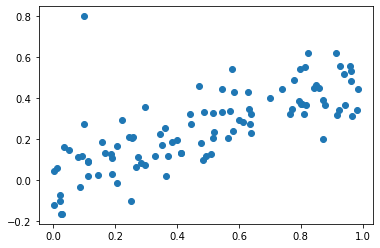

In [542]:
# You can also refer https://botlnec.github.io/islp/sols/chapter3/exercise14/#d
plt.scatter(x1,x2)
# Finding: One point does not follow the trend, so it looks like an outlier.
#          But that point doesn't have an unusual x1 value, so it doesn't look like an high leverage point.


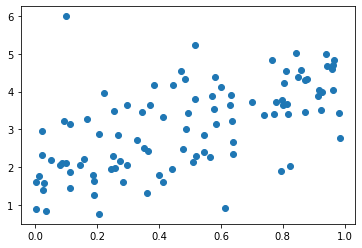

In [545]:
plt.scatter(x1,y)
# Findings: One point does not follow the trend, so it looks like an outlier.
#           That point doesn't have an unusual x1 value, so it doesn't look like an high leverage point

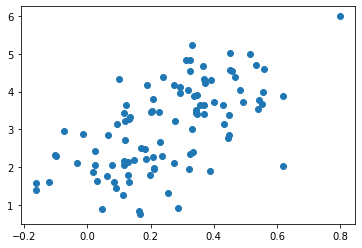

In [546]:
plt.scatter(x2,y)
# Findings: One point follows the trend, so it doesn't look like an outlier.
#           That point has an extreme x2 value, so it looks like an high leverage point

In [565]:
# Question 15 
from sklearn.datasets import load_boston
boston = load_boston()

In [566]:
# 15(a)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()
df['Price'] = boston.target # the Price column is available in other attribute called target.

In [569]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [570]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [571]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [572]:
list(df)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Price']

In [573]:
predictors = [c for c in list(df) if c not in ["CRIM"]]

In [574]:
print("{:>9}{:>22}{:>24}".format("predictor","coef", "pvalue" ))
for predictor in predictors:
    model = 'CRIM~' + predictor
    res = smf.ols(formula = model, data = df).fit()
    print("{:>9}{:>22}{:>24}". format(predictor, res.params[predictor],res.pvalues[predictor]))

# Findings: Every predictor except CHAS has a statistically significant association with CRIM at the 1% level.  

predictor                  coef                  pvalue
       ZN  -0.07393497740412372   5.506472107679275e-06
    INDUS     0.509776331104231   1.450348933027281e-21
     CHAS   -1.8927765508037595      0.2094345015352004
      NOX    31.248531201122923   3.751739260356816e-23
       RM   -2.6840512241139476   6.346702984687803e-07
      AGE   0.10778622713953305  2.8548693502441366e-16
      DIS   -1.5509016824100994    8.51994876692602e-19
      RAD    0.6179109273272024   2.693844398186058e-56
      TAX  0.029742252822765342   2.357126835256544e-47
  PTRATIO    1.1519827870705872   2.942922447359816e-11
        B -0.036279640567330726   2.487273973773681e-19
    LSTAT     0.548804782062398  2.6542772314731968e-27
    Price   -0.3631599222576031  1.1739870821944033e-19


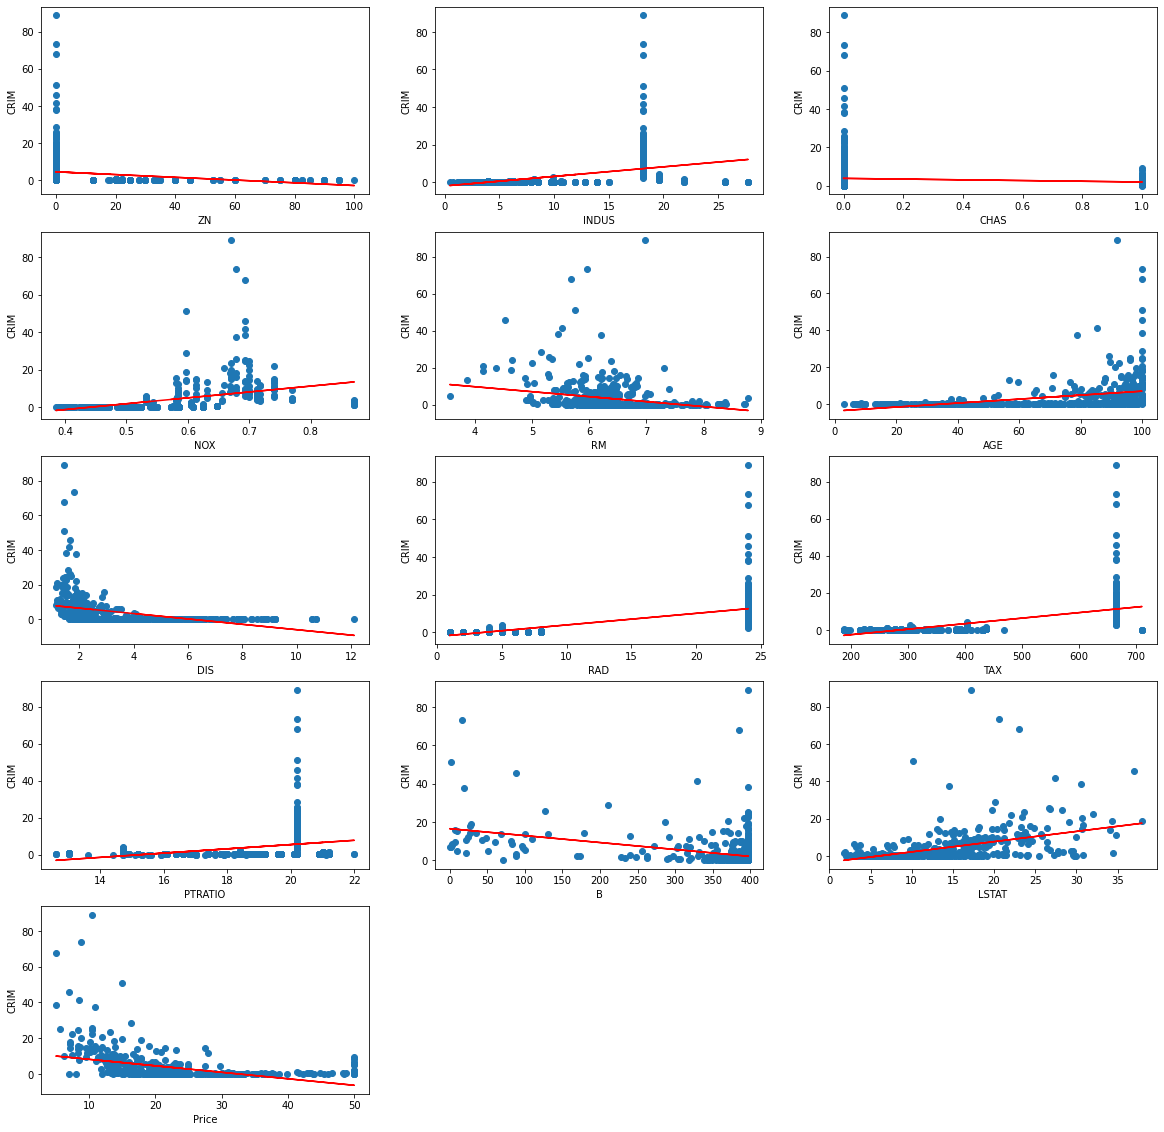

In [577]:
plt.figure(figsize=(20, 20))  # for better size

for i, predictor in enumerate(predictors):
    model = 'CRIM~ '+ predictor
    res = smf.ols(model,df).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.scatter(df[predictor], df['CRIM'])
    plt.plot(df[predictor], res.fittedvalues, color='red')

In [579]:
# 15(b)
all_columns = "+".join([c for c in list(df) if c not in ['CRIM']])
model = 'CRIM~ '+ all_columns
reg = smf.ols(model,df).fit()
reg.summary()
# Findings: We can reject null hypothesis for predictors: DIS, RAD, Price

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.57e-56
Time:                        16:31:35   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
ZN             0.0449      0.019      2.394      0.017       0.008       0.082
INDUS         -0.0639      0.083     -0.766      0.444      -0.228       0.100
CHAS          -0.7491      1.180     -0.635      0.526      -3.068       1.570
NOX          -10.3135      5.276     -1.955      0.051     -20.679       0.052
RM             0.4301      0.613      0.702      0.483      -0.774       1.634
AGE            0.0015      0.018      0.081      0.935      -0.034       0.037
DIS           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
RAD            0.5882      0.088      6.680      0.000       0.415       0.761
TAX           -0.0038      0.005     -0.733      0.464      -0.014       0.006
PTRATIO       -0.2711      0.186     -1.454      0.147      -0.637       0.095
B             -0.0075      0.004     -2.052      0.041      -0.015      -0.000
LSTAT          0.1262      0.076      1.667      0.096      -0.023       0.275
Price         -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [590]:
# 15(c)(d): Use R. Refer: https://blog.princehonest.com/stat-learning/ch3/applied.html